# «Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»

В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала. Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов. Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию. Для уменьшения вложения энергии при сварке:

1. Снижалась величина сварочного тока (IW);
2. Увеличивался ток фокусировки электронного пучка (IF);
3. Увеличивалась скорость сварки (VW);
4. Менялось расстояние от поверхности образцов до электронно-оптической системы (FP). 

По совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка 18-ти единиц образцов. Результаты металлографического контроля по размерам сварочного шва для каждого образца проводились в 4-х поперечных сечениях сварочного шва. Ускоряющее напряжение было постоянным в диапазоне 19,8 – 20 кВ. Набор полученных данных собраны в составе режимов сварки, размеров сварочных швов в поперечных сечениях всех образцов. Статистические показатели набора обучающих данных указаны в таблице.

|     Показатель    |    IW   |   IF    |   VW   |   FP   |  Depth  |  Width  | 
|-------------------|---------|---------|--------|--------|---------|---------|
|     Количество    |    72   |   72    |   72   |   72   |   72    |    72   |
|Среднее выборочное |  45,666 | 141,333 |  8,639 | 78,333 |  1,196  |  1,970  |
| Ср. кв. отклонение|  1,678  |  5,146  |  2,061 | 21,494 |  0,225  |  0,279  |
|       Минимум     |    43   |   131   |   4,5  |   50   |  0,80   |   1,68  |
|         25%       |    44   |   139   |    8   |   60   |  1,08   |   1,76  |
|         50%       |    45   |   141   |    9   |   80   |  1,20   |   1,84  |
|         75%       |    47   |   146   |   10   |   80   |  1,29   |   2,05  |
|      Максимум     |    49   |   150   |   12   |   125  |  1,76   |   2,60  |

## 1. Загрузка данных

In [75]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Подключение модуля для работы с файлами 
from google.colab import files
''' выбрать *.csv-файл'''
uploaded = files.upload()

# Получение имени файла
filename = next(iter(uploaded))
filename

Saving ebw_data.csv to ebw_data.csv


'ebw_data.csv'

In [76]:
# Подключить библиотеку Pandas с именем pd для чтения данных в таблицы
import pandas as pd

# Считать набор данных из файла
df = pd.read_csv(filename)

# Показать заголовок таблицы (первые 5 строк)
df.head()

,IW,IF,VW,FP,Depth,Width
0,47,139,4.5,80,1.60,2.54
1,47,139,4.5,80,1.62,2.50
2,47,139,4.5,80,1.68,2.60
3,47,139,4.5,80,1.58,2.52
4,45,140,4.5,80,1.76,2.48


Необходимо спрогнозировать две целевые переменные – `Depth` и `Width`

## 2. Разведочный анализ и подготовка данных

In [ ]:
# Форма входных данных
df.shape

(72, 6)

В наборе данных 72 строки и 6 столбцов (4 признака и 2 целевых переменные)

In [ ]:
# Получить информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB


Значения всех столбцов таблицы (признаков и целевых переменных в наборе данных) являются числами (целыми и вещественными)

In [ ]:
# Убедиться, что в наборе нет пропущенных значений
df.isna().sum()

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64

В наборе данных нет пропущенных (NaN) значений

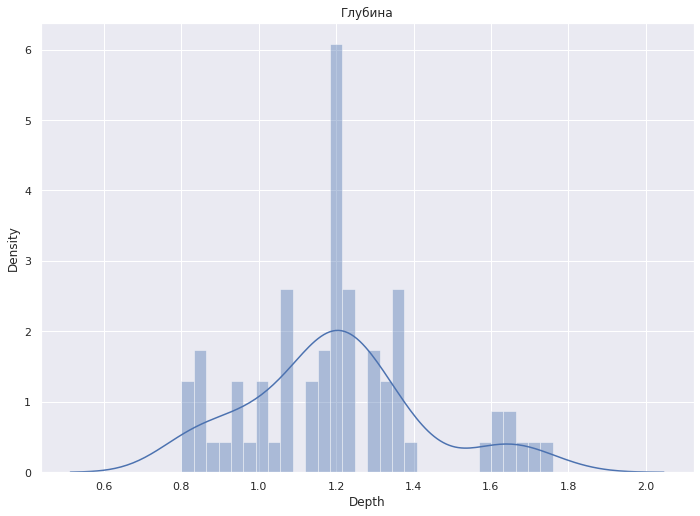

In [ ]:
# Подключение библиотек seaborn и matplotlib для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns

# Создать новую фигуру и установить ее размер
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Построить график распределения переменной
sns.distplot(df['Depth'], bins=30)

# Отобразить график
plt.title('Глубина')
plt.show()

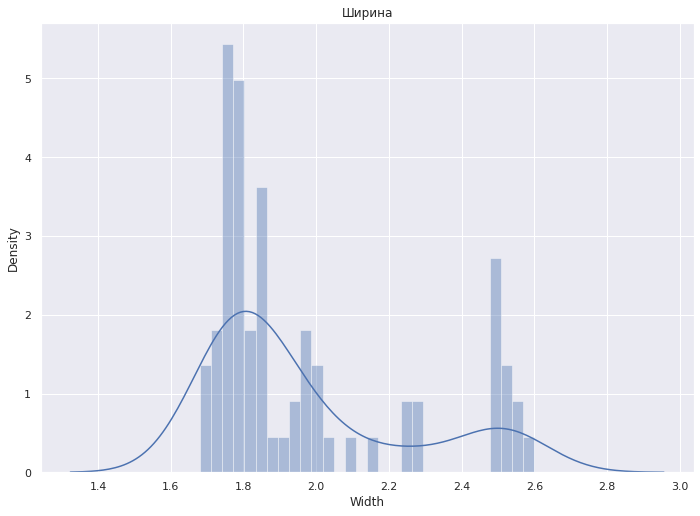

In [ ]:
sns.distplot(df['Width'], bins=30)
plt.title('Ширина')
plt.show()

Целевые переменные `Depth` и `Width` распределены нормально с небольшим количеством выбросов.

Один из распространенных способов найти выбросы в наборе данных — использовать межквартильный диапазон. Межквартильный диапазон, часто сокращенно IQR, представляет собой разницу между 25-м процентилем (Q1) и 75-м процентилем (Q3) в наборе данных. Он измеряет разброс средних 50% значений.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

IW        3.00
IF        7.00
VW        2.00
FP       20.00
Depth     0.21
Width     0.29
dtype: float64


IQR сообщает об изменении в наборе данных. Любое значение, выходящее за пределы диапазона от -1,5 x IQR до 1,5 x IQR, рассматривается как выброс. 

Концепцию квартилей и IQR лучше всего можно представить на блочной диаграмме. Он имеет минимальную и максимальную точки, определенные как Q1 – 1,5 * IQR и Q3 + 1,5 * IQR соответственно. Любая точка вне этого диапазона является выбросом.

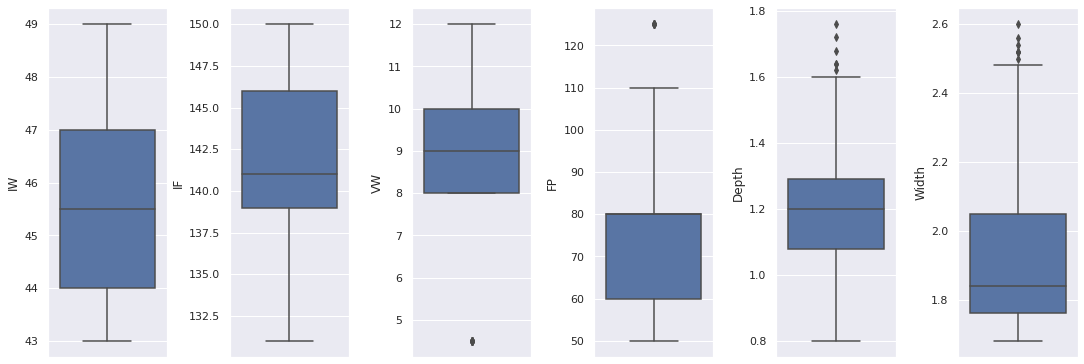

In [ ]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15, 5))
ax = ax.flatten()
ind = 0
for i in df.columns:
  sns.boxplot(y=i, data=df, ax=ax[ind])
  ind +=1
plt.tight_layout(pad=0.4)
plt.show()

Столбцы `VW`, `FP`, `Depth`, и `Width` имеют выбросы



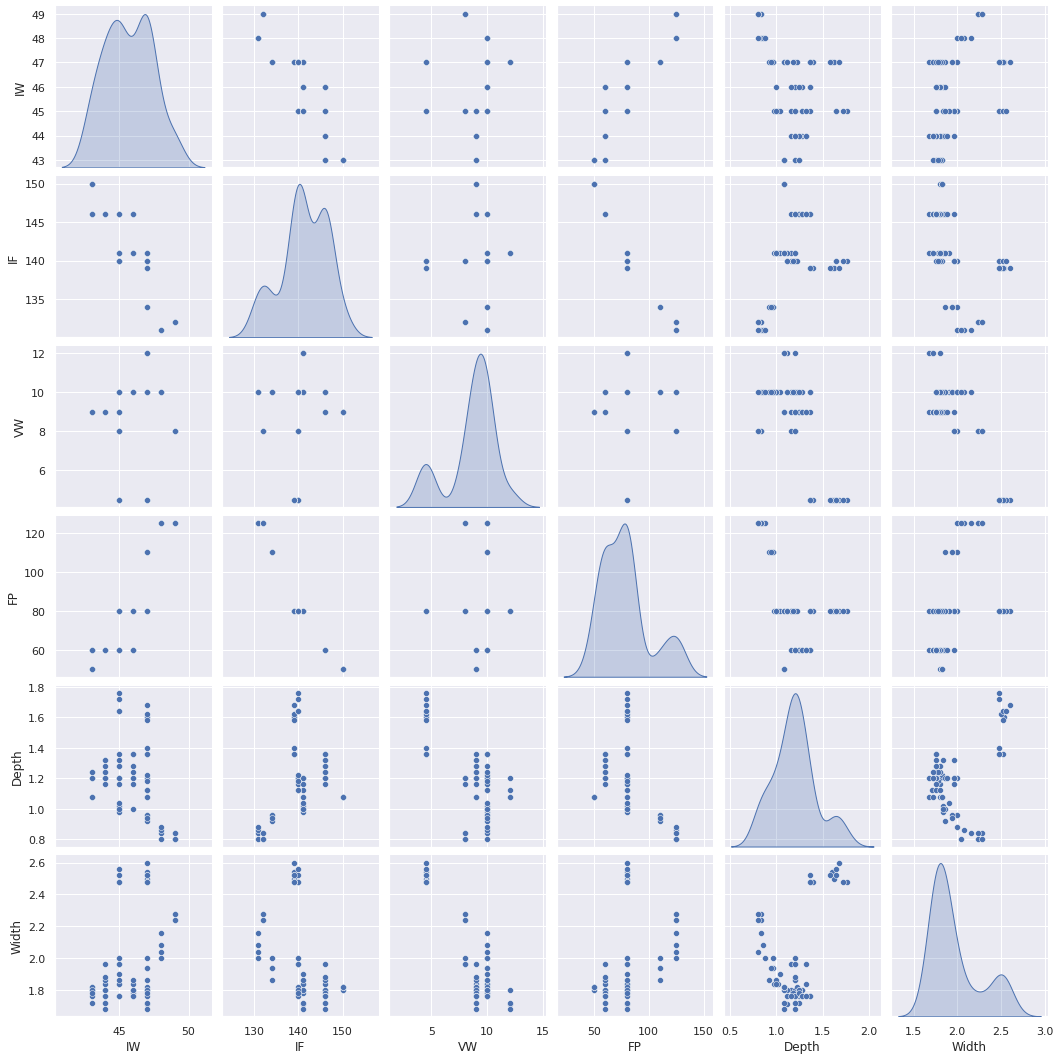

In [ ]:
# Построение парных графиков
sns.pairplot(df, diag_kind='kde')

Из парных графиков подтверждается вывод о том, что целевые переменные содержат несколько выбросов. Лучшие показатели распределения, по-видимому, имеет признак `IW`

## 3. Очистка данных

Теперь можно преобразовать набор данных, удалив выбросы

In [81]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.head()

,IW,IF,VW,FP,Depth,Width
8,45,140,8.0,80,1.20,2.00
9,45,140,8.0,80,1.20,1.96
10,45,140,8.0,80,1.16,1.96
11,45,140,8.0,80,1.20,1.96
12,45,141,10.0,80,0.98,1.84


In [82]:
df_out.shape

(52, 6)

В наборе данных осталось 52 строки и 6 столбцов. Можно построить матрицу корреляции:

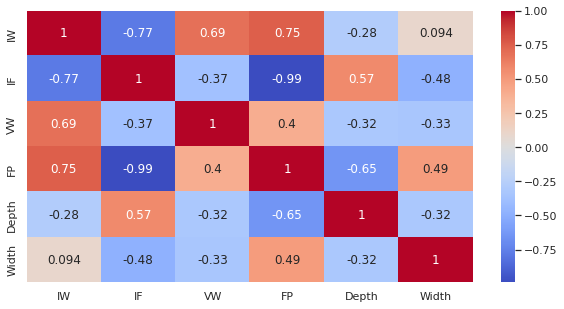

In [79]:
# Создать новую фигуру 10 х 5
plt.figure(figsize=(10,5))

# Отобразить тепловую карту с отображением коэффициентов для матрицы корреляции набора данных
sns.heatmap(df_out.corr(), annot=True, cmap='coolwarm')

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию. Из полученной матрицы нельзя сделать вывод, что целевые переменные связаны с какой-то переменной. 

Наблюдается высокая отрицательная корреляция (обратная зависимость) с переменной `IF` у признака `VW`, а также положительная корреляция (прямая зависимость) с переменной `IW` у признака `FP`. Таким образом:

1. Чем ниже ток фокусировки электронного пучка, тем выше скорость сварки 
2. Большое расстояние от поверхности образцов до электронно-оптической системы соответствует большой величине сварочного тока

## 4. Моделирование

In [83]:
from sklearn.model_selection import train_test_split

def train_test(df, target):
  # Удалить ширину либо глубину в зависимости от цели предсказания
  if target == 'Width':
    df2 = df.drop(columns='Depth', axis=1)
  elif target == 'Depth':
    df2 = df.drop(columns='Width', axis=1)

  # Разбить данные на обучающую и тестовую выборку в соотношении 80:20
  X_train, X_test = train_test_split(df2, test_size=0.2, random_state=42)

  # Скопировать целевую переменную target в y, а остальное – в X
  y_train = X_train[target].copy()
  X_train = X_train.drop([target], axis=1)
  
  y_test = X_test[target].copy()
  X_test = X_test.drop([target], axis=1)

  return X_train, y_train, X_test, y_test

# Создать выборки для глубины сварного шва
X_d_train, y_d_train, X_d_test, y_d_test = train_test(df_out, 'Depth')

# Создать выборки для ширины сварного шва
X_w_train, y_w_train, X_w_test, y_w_test = train_test(df_out, 'Width')

In [84]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Получить результат предсказания для классификатора clf на наборе (X_train, y_train, X_test, y_test)
def getResult(clf, X_train, y_train, X_test, y_test):
  best_res = clf
  best_res.fit(X_train, y_train)
  res_predictions = best_res.predict(X_test)
  res_mse = mean_squared_error(y_test, res_predictions)
  return np.sqrt(res_mse)

### 4.1 Случайный лес


Первая рассматриваемая модель – случайный лес (регрессор). 

Параметры метода, которые передавались для составления комбинаций и оценки различных моделей, были найдены в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = [
              {'n_estimators':[3,10,30,50], 'max_features':[2,4,6,8,10]}, 
              {'bootstrap':[False], 'n_estimators':[3,10,15,20], 'max_features':[2,3,4,5]},
              ]

rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

print('Лучшие параметры регрессора на основе случайного леса для глубины: ', rf_reg.fit(X_d_train, y_d_train).best_params_)
print('Лучшие параметры регрессора на основе случайного леса для ширины: ', rf_reg.fit(X_w_train, y_w_train).best_params_)

Лучшие параметры регрессора на основе случайного леса для глубины:  {'max_features': 2, 'n_estimators': 30}
Лучшие параметры регрессора на основе случайного леса для ширины:  {'max_features': 4, 'n_estimators': 50}


Теперь можно передать полученные лучшие параметры модели для ее обучения и тестирования:

In [86]:
clf1 = RandomForestRegressor(bootstrap=False, max_features=2, n_estimators=30)
rf_err_d = getResult(clf1, X_d_train, y_d_train, X_d_test, y_d_test)
print("Средняя ошибка модели регрессора на основе случайного леса для глубины: %0.5f" % rf_err_d)

clf2 = RandomForestRegressor(max_features=4, n_estimators=50)
rf_err_w = getResult(clf2, X_w_train, y_w_train, X_w_test, y_w_test)
print("Средняя ошибка модели регрессора на основе случайного леса для ширины: %0.5f" % rf_err_w)

Средняя ошибка модели регрессора на основе случайного леса для глубины: 0.03108
Средняя ошибка модели регрессора на основе случайного леса для ширины: 0.04607


### 4.2 Градиентный бустинг деревьев

Следующая модель – градиентный бустинг.

Параметры метода, которые передавались для составления комбинаций и оценки различных моделей, были найдены в [документации](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [87]:
from xgboost.sklearn import XGBRegressor

parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
              }

xgb_reg = GridSearchCV(XGBRegressor(random_state=42), parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

print('Лучшие параметры регрессора на основе градиентного бустинга для глубины: ', xgb_reg.fit(X_d_train, y_d_train).best_params_)
print('Лучшие параметры регрессора на основе градиентного бустинга для ширины: ', xgb_reg.fit(X_w_train, y_w_train).best_params_)

Лучшие параметры регрессора на основе градиентного бустинга для глубины:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}
Лучшие параметры регрессора на основе градиентного бустинга для ширины:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


Теперь можно передать полученные лучшие параметры модели для ее обучения и тестирования:

In [88]:
clf3 = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=5, 
                        min_child_weight=4, n_estimators=500, nthread=4, 
                        objective='reg:linear', silent=1, subsample=0.7)
xgb_err_d = getResult(clf3, X_d_train, y_d_train, X_d_test, y_d_test)
print("Средняя ошибка модели регрессора на основе градиентного бустинга для глубины: %0.5f" % xgb_err_d)

clf4 = XGBRegressor(colsample_bytree=0.7, learning_rate=0.05, max_depth=5, 
                        min_child_weight=4, n_estimators=500, nthread=4, 
                        objective='reg:linear', silent=1, subsample=0.7)
xgb_err_w = getResult(clf4, X_w_train, y_w_train, X_w_test, y_w_test)
print("Средняя ошибка модели регрессора на основе градиентного бустинга для ширины: %0.5f" % xgb_err_w)

Средняя ошибка модели регрессора на основе градиентного бустинга для глубины: 0.08241
Средняя ошибка модели регрессора на основе градиентного бустинга для ширины: 0.05801


### 4.3 Искусственная нейронная сеть (многослойный персептрон)

Следующая модель – искусственная нейронная сеть (многослойный персептрон).

Параметры метода, которые передавались для составления комбинаций и оценки различных моделей, были найдены в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [89]:
from sklearn.neural_network import MLPRegressor

parameters = {
    'hidden_layer_sizes': [(1,),(50,)], 
    'activation': ['identity', 'logistic', 'tanh', 'relu'], 
    'solver': ['lbfgs', 'sgd', 'adam'], 
    'alpha': [0.00005,0.0005]
    }

mlp_reg = GridSearchCV(MLPRegressor(random_state=42), parameters, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

print('Лучшие параметры регрессора на основе многослойного персептрона для глубины: ', mlp_reg.fit(X_d_train, y_d_train).best_params_)
print('Лучшие параметры регрессора на основе многослойного персептрона для ширины: ', mlp_reg.fit(X_w_train, y_w_train).best_params_)

Лучшие параметры регрессора на основе многослойного персептрона для глубины:  {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}
Лучшие параметры регрессора на основе многослойного персептрона для ширины:  {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (50,), 'solver': 'lbfgs'}


Теперь можно передать полученные лучшие параметры модели для ее обучения и тестирования:

In [90]:
clf5 = MLPRegressor(activation='logistic', alpha=0.0005, hidden_layer_sizes=(50,), solver='lbfgs')
mlp_err_d = getResult(clf5, X_d_train, y_d_train, X_d_test, y_d_test)
print("Средняя ошибка модели регрессора на основе многослойного персептрона для глубины: %0.5f" % mlp_err_d)

clf6 = MLPRegressor(activation='logistic', alpha=0.0005, hidden_layer_sizes=(50,), solver='lbfgs')
mlp_err_w = getResult(clf6, X_w_train, y_w_train, X_w_test, y_w_test)
print("Средняя ошибка модели регрессора на основе многослойного персептрона для ширины: %0.5f" % mlp_err_w)

Средняя ошибка модели регрессора на основе многослойного персептрона для глубины: 0.03065
Средняя ошибка модели регрессора на основе многослойного персептрона для ширины: 0.03564


### 4.4 Сравнение результатов

In [91]:
algo = ['Случайный лес', 'Градиентный бустинг деревьев', 'Многослойный персептрон']

def plot_comparison(errs, title):
  fig, ax = plt.subplots(figsize=(12,8))
  ax.bar(algo, errs, width=0.4)
  for index, data in enumerate(errs):
    plt.text(x=index, y=data+0.0012, s=f"{round(data, 4)}", fontdict=dict(fontsize=10))
  ax.set_xlabel('Модели')
  ax.set_ylabel('Средняя ошибка')
  ax.set_title('Сравнение алгоритмов предсказания {} сварного шва'.format(title))
  plt.tight_layout()
  plt.show()

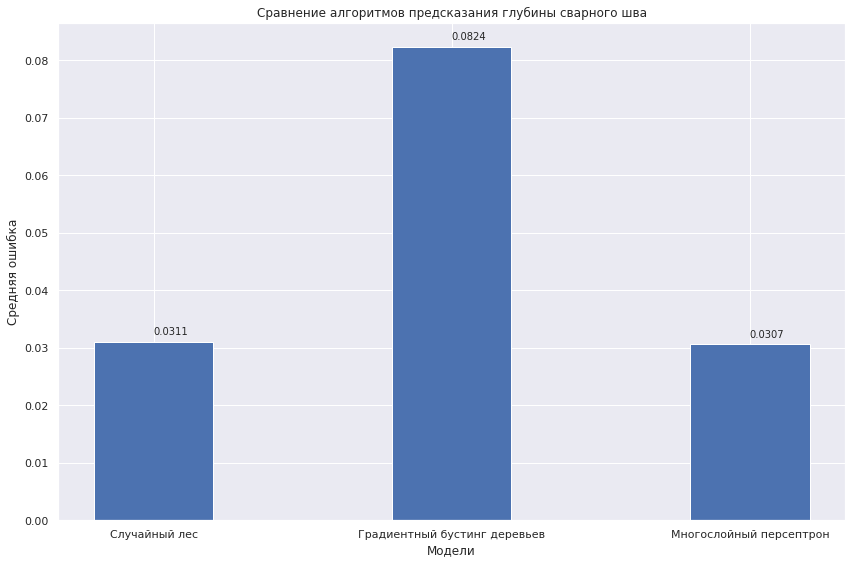

In [92]:
errs_d = [rf_err_d, xgb_err_d, mlp_err_d]
plot_comparison(errs_d, 'глубины')

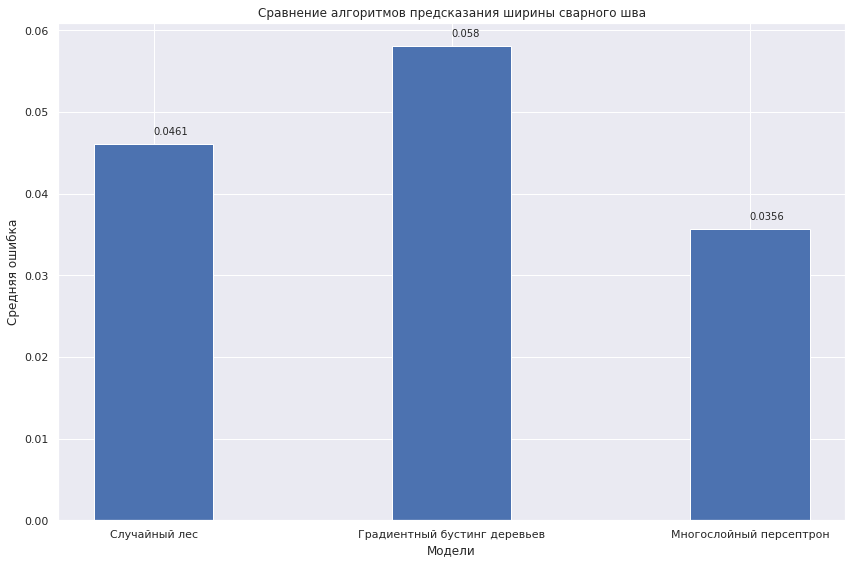

In [93]:
errs_w = [rf_err_w, xgb_err_w, mlp_err_w]
plot_comparison(errs_w, 'ширины')

Лучшие показатели среднеквадратичной ошибки:
*   при предсказании глубины – у многослойного персептрона; 
*   при предсказании ширины – у многослойного персептрона.

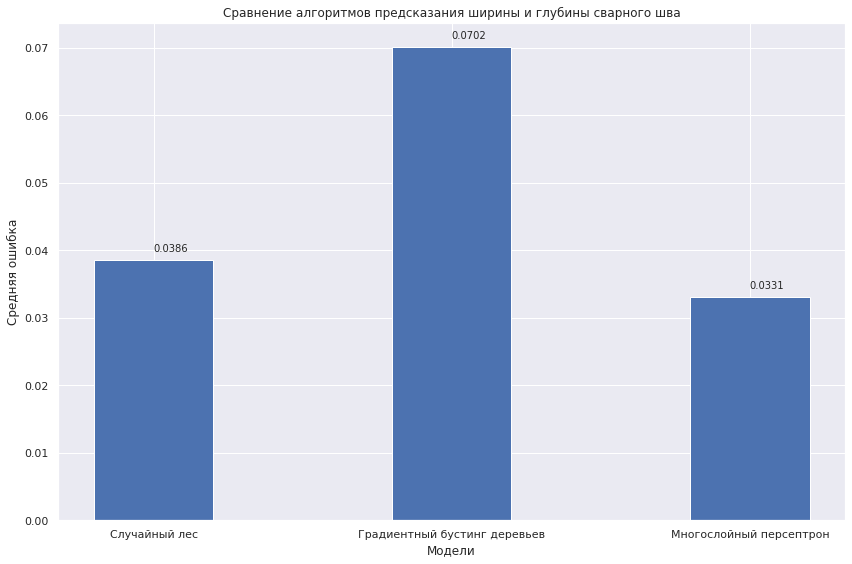

In [94]:
errs = [sum(x) / 2 for x in zip(errs_w, errs_d)]
plot_comparison(errs, 'ширины и глубины')

Для среднего арифметического среднеквадратичных ошибок лучшие показатели – у многослойного персептрона.

In [95]:
import pickle
import sys

mlp1 = pickle.dumps(clf5)
print('Размер модели многослойного персептрона (байт) для предсказания глубины:', sys.getsizeof(mlp1))

mlp2 = pickle.dumps(clf6)
print('Размер модели многослойного персептрона (байт) для предсказания ширины:', sys.getsizeof(mlp2))

Размер модели многослойного персептрона (байт) для предсказания глубины: 6327
Размер модели многослойного персептрона (байт) для предсказания ширины: 6327


In [96]:
pickle.dump(clf5, open('mlp1.pkl', 'wb'))

In [97]:
pickle.dump(clf6, open('mlp2.pkl', 'wb'))